In [1]:
# pip install mysql-connector-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import mysql.connector

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="root")

In [4]:
query = "SELECT * FROM insurance_case.insure1"

In [5]:
df = pd.read_sql(query, cnx)

C:\Users\BillJ\AppData\Local\Temp\ipykernel_24604\1600954950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [6]:
cnx.close()

In [7]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.shape

(1338, 7)

In [11]:
np.mean(df["bmi"])
df["bmi"].mean()
# Both are same but numpy works for all datastructures and .mean() is a dataframe pandas function call

30.66339686098655

In [12]:
# Average insurance charge
avg_charge = df['charges'].mean()
# Median Insurance charge
med_charge = df['charges'].median()
# Average BMI
df["bmi"].mean()

30.66339686098655

In [13]:
# Smoking ratio (% of smokers vs non-smokers)
df['smoker_num'] = df['smoker'].map({'yes':1, 'no':0})
# Total count
df['smoker_num'].count()
# Individual count of all unique values and value_count() returns a pandas series
df['smoker_num'].value_counts()
# non_smokers = 

smoker_num
0    1064
1     274
Name: count, dtype: int64

From the above observation, we can tell senior are more concerned about their health

In [15]:

# This creates a Boolean series where only 1s are True, and sum() counts how many Trues there are.
df['smoker_num'].value_counts(normalize=True).get(1, 0) * 100
# The below is a manual basic form of code to get the same for smokers and vice versa for non-smokers
((df['smoker_num'] == 1).sum()/df['smoker_num'].count()) * 100

# Most efficient way to achieve the percentage of binary data is:
smoker_per = (df['smoker_num'] == 1).mean() * 100
nsmoker_per = (df['smoker_num'] == 0).mean() * 100

print('smoker percentage :',smoker_per,' Non Smoker percentage :', nsmoker_per)

smoker percentage : 20.47832585949178  Non Smoker percentage : 79.52167414050822


In [16]:
# Average Charge by Smoker vs Non-Smoker
smoker_charge = df.loc[df['smoker_num'] == 1, 'charges'].sum()
nsmoker_charge = df.loc[df['smoker_num'] == 0, 'charges'].sum()

smoker_avgcharge = df.loc[df['smoker_num'] == 1, 'charges'].mean()
nsmoker_avgcharge = df.loc[df['smoker_num'] == 0, 'charges'].mean()

print("total Smoker charged : ",smoker_charge,"Total Non-Smoker charged : ",nsmoker_charge)
print("Average Smoker charged : ",smoker_avgcharge,"Average Non-Smoker charged : ",nsmoker_avgcharge)

total Smoker charged :  8781763.521839999 Total Non-Smoker charged :  8974061.468919002
Average Smoker charged :  32050.23183153284 Average Non-Smoker charged :  8434.268297856204


In [17]:
# Charge by Region or Age Group
# First to find the number of regions we are dealing with:
uniq = df['region'].value_counts()
print(uniq)
# Now to find the sume of charges for each of these regions:
df['region'].value_counts(normalize=True)
se_charge = df.loc[df['region']=="southeast", 'charges'].sum()
print('Total charges for the SE region : ',se_charge)

# Scalable way to find desired calculations for unique values groupby():
all_reg = df.groupby('region')['charges'].sum()
print(all_reg['southeast'])  # groupby() returns a pandas series so we can get a value using labels
print(type(all_reg))

# We can also get the groupby() as a DF:
all_regdf = df.groupby('region')[['charges']].sum() #Just wrap the column name with a sqr bracket
print(type(all_regdf))

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Total charges for the SE region :  5363689.763289999
5363689.76329
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
# Categorizing age to stages:
bins = [0, 29, 40, 60, float('inf')]
labels = ['young', 'junior', 'senior', 'super senior']

df['age_cat'] = pd.cut(df['age'], bins = bins, labels=labels, right=False)

In [19]:
print(df['age_cat'].value_counts())

age_cat
senior          550
young           390
junior          284
super senior    114
Name: count, dtype: int64


In [20]:
reg_charges = df.groupby('age_cat', observed=True)['charges'].sum()

print(reg_charges)

age_cat
young           3.547483e+06
junior          3.298482e+06
senior          8.487586e+06
super senior    2.422274e+06
Name: charges, dtype: float64


<Axes: xlabel='age_cat'>

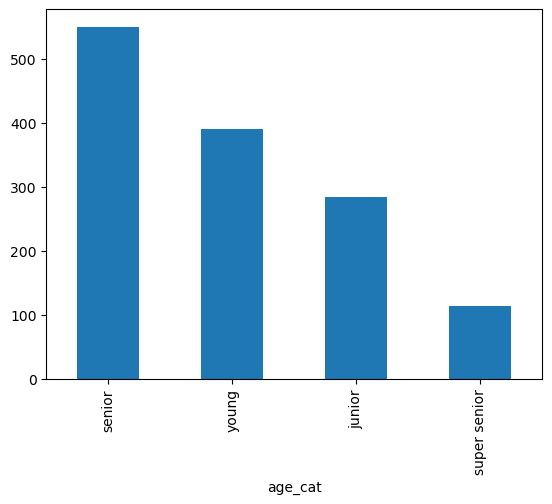

In [21]:
df['age_cat'].value_counts().plot(kind='bar')

In [22]:
print(df.head(8))

   age     sex     bmi  children smoker     region      charges  smoker_num  \
0   19  female  27.900         0    yes  southwest  16884.92400           1   
1   18    male  33.770         1     no  southeast   1725.55230           0   
2   28    male  33.000         3     no  southeast   4449.46200           0   
3   33    male  22.705         0     no  northwest  21984.47061           0   
4   32    male  28.880         0     no  northwest   3866.85520           0   
5   31  female  25.740         0     no  southeast   3756.62160           0   
6   46  female  33.440         1     no  southeast   8240.58960           0   
7   37  female  27.740         3     no  northwest   7281.50560           0   

  age_cat  
0   young  
1   young  
2   young  
3  junior  
4  junior  
5  junior  
6  senior  
7  junior  


C:\Users\BillJ\AppData\Local\Temp\ipykernel_24604\2884572626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_rate = df.groupby('age_cat')['smoker_num'].mean() * 100


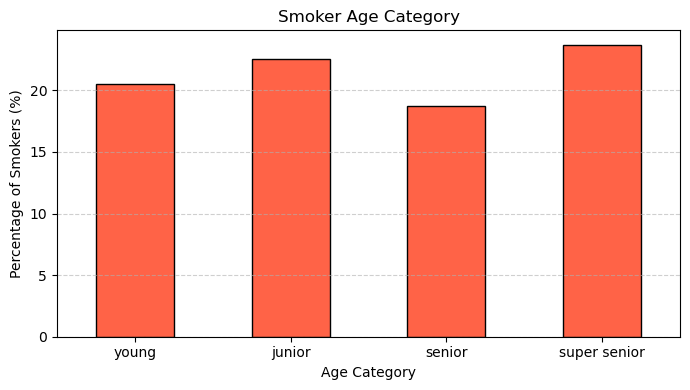

In [29]:
# Step 1 group by age category
smoker_rate = df.groupby('age_cat')['smoker_num'].mean() * 100

# Step 2 plot
plt.figure(figsize=(7,4))
smoker_rate.plot(kind='bar', color='tomato', edgecolor='black')

# Step 3: Labels and title
plt.xlabel("Age Category")
plt.ylabel("Percentage of Smokers (%)")
plt.title("Smoker Age Category")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


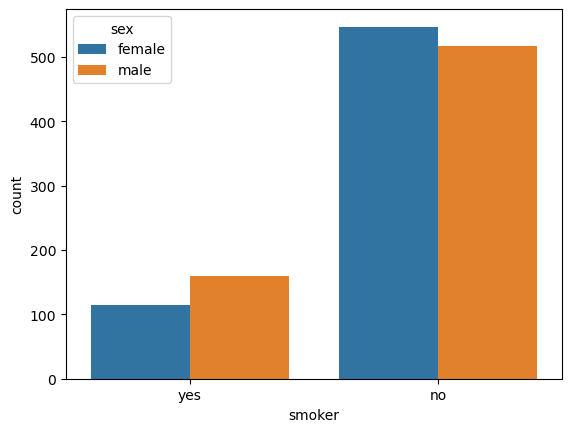

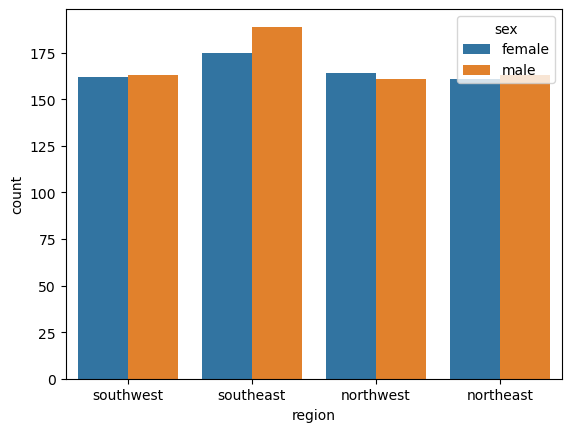

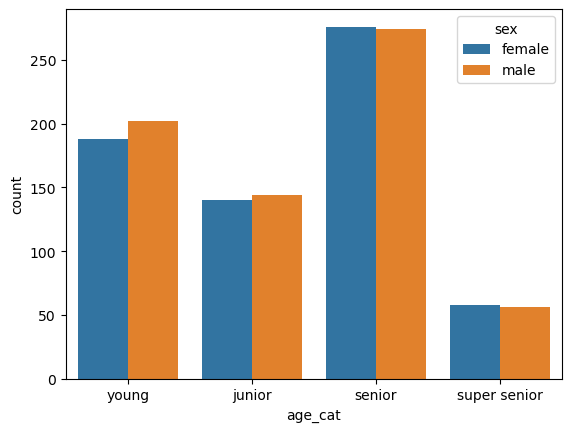

In [23]:
for i,predictor in enumerate(df[['smoker', 'region', 'age_cat']]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='sex')

D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


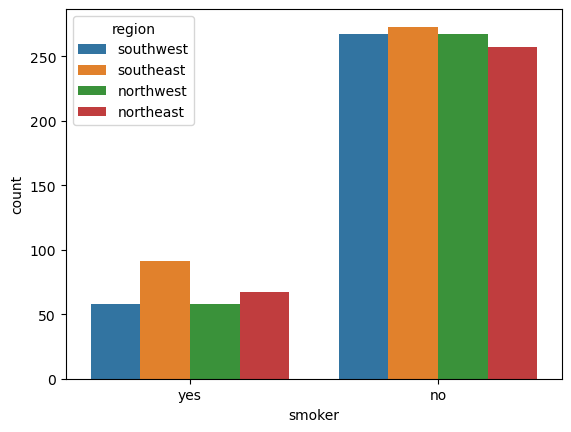

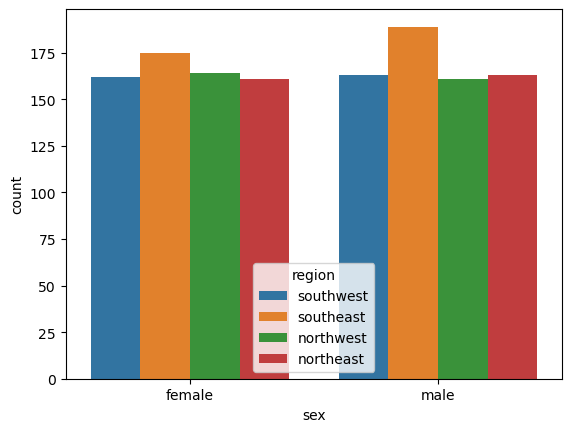

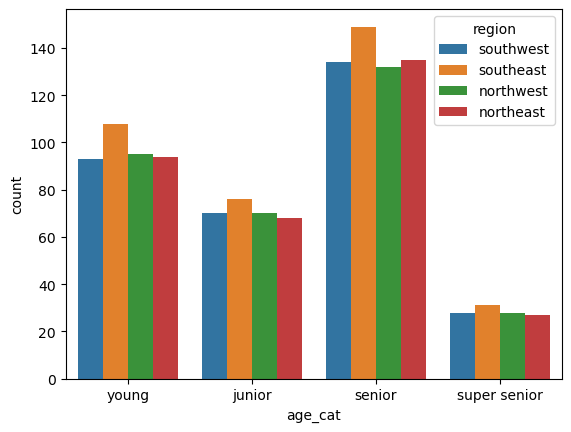

In [24]:
for i,predictor in enumerate(df[['smoker', 'sex', 'age_cat']]):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='region')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   object  
 2   bmi         1338 non-null   float64 
 3   children    1338 non-null   int64   
 4   smoker      1338 non-null   object  
 5   region      1338 non-null   object  
 6   charges     1338 non-null   float64 
 7   smoker_num  1338 non-null   int64   
 8   age_cat     1338 non-null   category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 85.3+ KB


In [26]:
# To find state of parenting, we can use lambda expression along with apply()
df['is_parent'] = df['children'].apply(lambda x: 1 if x>0 else 0)
# Another faster way is to use Vectorized Comparison
# df['is_parent'] = (df['children'] > 0).astype(int)

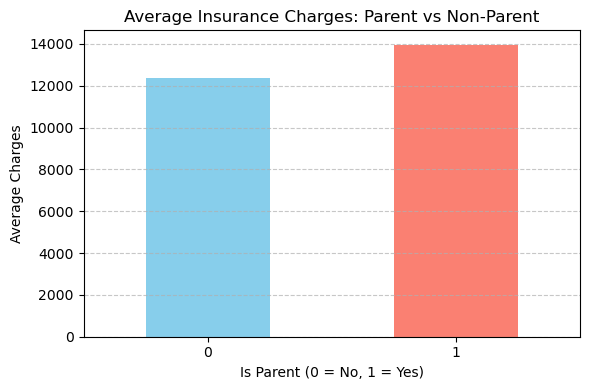

In [27]:
p_avg = df.groupby('is_parent')['charges'].mean()

# Plot
plt.figure(figsize=(6,4))
p_avg.plot(kind='bar', color=['skyblue', 'salmon'])

# Labeling
plt.xlabel('Is Parent (0 = No, 1 = Yes)')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges: Parent vs Non-Parent')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From above observation parents tend to pay more attention to insurance.

In [38]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_num,age_cat,is_parent,ID
0,19,female,27.900,0,yes,southwest,16884.92400,1,young,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,young,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,young,1,3
3,33,male,22.705,0,no,northwest,21984.47061,0,junior,0,4
4,32,male,28.880,0,no,northwest,3866.85520,0,junior,0,5


In [35]:
# This will form the ID column using the record index value (0 to N)
# df['ID'] = df.index
# To form the ID field from 1 to N
df['ID'] = range(1, len(df)+1)
# Sample code to form custom ID field in our df
# df['ID'] = ['CUST' + str(i).zfill(3) for i in range(1, len(df) + 1)] # This gives you: 'CUST001', 'CUST002', ...'CUST123'

In [39]:
# To move the field ID to first position we can reorder the df before saving:
# Get current columns
cols = df.columns.tolist()

# Reorder: place 'ID' at the front using list comprehension
cols = ['ID'] + [col for col in cols if col != 'ID']

# Reassign with new column order
df = df[cols]
df.head(5)

,ID,age,sex,bmi,children,smoker,region,charges,smoker_num,age_cat,is_parent
0,1,19,female,27.900,0,yes,southwest,16884.92400,1,young,0
1,2,18,male,33.770,1,no,southeast,1725.55230,0,young,1
2,3,28,male,33.000,3,no,southeast,4449.46200,0,young,1
3,4,33,male,22.705,0,no,northwest,21984.47061,0,junior,0
4,5,32,male,28.880,0,no,northwest,3866.85520,0,junior,0


In [40]:
df.to_csv('D:/NCI_ML_SelfLearn/Projects/Insurance_Level1/insure_lvl1_transformed.csv', index = False)